# 1) Imports

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
import warnings 
warnings.filterwarnings('ignore')

/Users/ahilan/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.linspace(0,100)

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

## Importing Dataframe

Allow maximum view of Dataframe.

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

Importing US Data Analytics from 2019 dataset.

In [4]:
df = pd.read_csv("analytic_data2019.csv", low_memory=False)

# 2) EDA

## Early Exploration and Cleaning

In [5]:
df.shape

(3195, 534)

In [6]:
df.head(2)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

### Removing Columns

We saw that there were many columns based on statistics of other columns and decided to remove them. 

In [7]:
cicols = []
for column in df.columns:
    if ("CI" in column) or ("(Black)" in column) or ("(White)" in column) or ("(Hispanic)" in column) or ("numerator" in column) or ("denominator" in column):
        cicols.append(column)

In [8]:
df_clean1 = df.drop(cicols, axis=1)

In [9]:
df_clean1.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental health providers raw value,Ratio of population to mental health providers.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Child mortality raw value,Infant mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,HIV prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Drug overdose deaths raw value,Motor vehicle crash deaths raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Disconnected youth raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Residential segregation - Black/White raw value,Residential segregation - non-white/white raw value,Homicides raw value,Firearm fatalities raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value,Communicable disease raw value,Self-inflicted injury hospitalizations raw value,Cancer incidence raw value,Coronary heart disease hospitalizations raw value,Cerebrovascular disease hospitalizations raw value,Smoking during pregnancy raw value,Drug arrests raw value,Opioid hospital visits raw value,Alcohol-related hospitalizations raw value,Motor vehicle crash occupancy rate raw value,On-road motor vehicle crash-related ER visits raw value,Off-road motor vehicle crash-related ER visits raw value,Childhood immunizations raw value,Reading proficiency raw value,W-2 enrollment raw value,Poverty raw value,Older adults living alone raw value,Hate crimes raw value,Child abuse raw value,Injury hospitalizations raw value,Fall fatalities 65+ raw value,Year structure built raw value,Male population 0-17 raw value,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue

By removing the statistic based columns we reduced the variables from 534 to 119.

In [10]:
df_clean1.shape

(3195, 119)

Next we checked the number of null values in the remaining columns that were greater than 100 and then removed them.

In [11]:
df_clean1.isnull().sum()[df_clean1.isnull().sum() > 100].sort_values(ascending=False)

Hate crimes raw value                                          3181
Alcohol-related hospitalizations raw value                     3131
Fall fatalities 65+ raw value                                  3129
Self-inflicted injury hospitalizations raw value               3124
Coronary heart disease hospitalizations raw value              3123
Cerebrovascular disease hospitalizations raw value             3123
Drug arrests raw value                                         3122
Off-road motor vehicle crash-related ER visits raw value       3122
Opioid hospital visits raw value                               3122
W-2 enrollment raw value                                       3121
Total female population raw value                              3121
Motor vehicle crash occupancy rate raw value                   3121
Smoking during pregnancy raw value                             3121
On-road motor vehicle crash-related ER visits raw value        3121
Cancer incidence raw value                      

In [12]:
null_cols = []
for column in df_clean1.columns:
    if column in df_clean1.columns[df_clean1.isnull().sum() > 100]:
        null_cols.append(column)

In [13]:
df_clean1 = df_clean1.drop(null_cols, axis=1)

Removing columns with a 100 or more nulls we reduced the variables from 119 to 66.

In [14]:
df_clean1.shape

(3195, 66)

In [15]:
df_clean1.head(2)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Uninsured raw value,Dentists raw value,Ratio of population to dentists.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue,v036_rawvalue,v042_rawvalue,v009_rawvalue,v011_rawvalue,v133_rawvalue,v070_rawvalue,v132_rawvalue,v049_rawvalue,v134_rawvalue,v085_rawvalue,v088_rawvalue,v088_other_data_1,v005_rawvalue,v050_rawvalue,v155_rawvalue,v021_rawvalue,v069_rawvalue,v023_rawvalue,v024_rawvalue,v044_rawvalue,v082_rawvalue,v140_rawvalue,v125_rawvalue,v124_rawvalue,v136_rawvalue,v136_other_data_1,v136_other_data_2,v136_other_data_3,v067_rawvalue,v137_rawvalue,v147_rawvalue,v127_rawvalue,v144_rawvalue,v145_rawvalue,v060_rawvalue,v139_rawvalue,v083_rawvalue,v143_rawvalue,v003_rawvalue,v122_rawvalue,v131_rawvalue,v131_other_data_1,v063_rawvalue,v153_rawvalue,v154_rawvalue,v051_rawvalue,v052_rawvalue,v053_rawvalue,v054_rawvalue,v055_rawvalue,v081_rawvalue,v080_rawvalue,v056_rawvalue,v126_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue
1,00,000,00000,US,United States,2019,NaN,6900.630354,NaN,NaN,NaN,NaN,0.285,7.7,0.222,0.8389448174,NaN,0.2857150971,0.1000885875,0.0006843073,1461.3318468,NaN,NaN,NaN,0.846,0.6522563975,0.0435556876,0.184,4.9414857531,0.3325168477,9.3003532014,NaN,NaN,0.1837308951,NaN,NaN,NaN,0.7644223139,0.352,79.063850411,339.5,NaN,NaN,0.102,0.129,0.0590124246,NaN,0.1208028915,0.0467021934,0.0008823736,1133.3068134,60336,0.6381868061,0.1512417878,325719178,0.2261315359,0.1561427218,0.1248080179,0.0126007164,0.0582988669,0.0024114976,0.1809740813,0.6072810456,0.0445539242,0.5075263299,NaN


We dropped the first row in the dataset as it contained a subset of columns names.

In [16]:
df_clean1.drop(df_clean1.index[0],inplace=True)

We saw that there were extra rows for the entire US and a mean for each State. To keep each row relatable to each other we abandoned those rows.

In [17]:
df_clean1.head(3)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Uninsured raw value,Dentists raw value,Ratio of population to dentists.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
1,00,000,00000,US,United States,2019,NaN,6900.630354,NaN,NaN,NaN,NaN,0.285,7.7,0.222,0.8389448174,NaN,0.2857150971,0.1000885875,0.0006843073,1461.3318468,NaN,NaN,NaN,0.846,0.6522563975,0.0435556876,0.184,4.9414857531,0.3325168477,9.3003532014,NaN,NaN,0.1837308951,NaN,NaN,NaN,0.7644223139,0.352,79.063850411,339.5,NaN,NaN,0.102,0.129,0.0590124246,NaN,0.1208028915,0.0467021934,0.0008823736,1133.3068134,60336,0.6381868061,0.1512417878,325719178,0.2261315359,0.1561427218,0.1248080179,0.0126007164,0.0582988669,0.0024114976,0.1809740813,0.6072810456,0.0445539242,0.5075263299,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,0.2140240566,4.4004575204,4.577366748,0.215381544,0.351,5.8,0.282,0.6164961831,0.1417814586,0.2859025033,0.107717996,0.0004761273,2100.2787592,5496,0.42,0.42,0.893,0.5986474992,0.0439678517,0.244,5.238579235,0.3810461622,12.242715851,11,0.0746268657,0.1491215019,NaN,NaN,NaN,0.8586852864,0.337,75.41303499,472.4,0.1401604896,0.1454883116,0.139,0.165,0.0792142495,0.3772095459,0.1384998828,0.0266538976,0.0007559367,1322.8621438,48193,0.6857437544,0.1291760781,4874747,0.2247240729,0.1648846597,0.2652090457,0.0069968759,0.0146341954,0.0010747224,0.0432961957,0.6557985471,0.0107484565,0.5159059537,0.409631829
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.2881355932,0.085009665,0.000324301,3083.5555556,6599,0.44,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0,0.1495464575,0.1320522296,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.1096110384,0.0247619048,0.0003062842,3264.9411765,58343,0.732877363,0.1264520575,55504,0.2393701355,0.1511963102,0.1925446815,0.004756414,0.0127918709,0.0010449697,0.0285745172,0.7447391179,0.0082854831,0.513422456,0.4200216232


In [18]:
df_clean1.drop(df_clean1[df_clean1["County Ranked (Yes=1/No=0)"].isnull()].index,inplace=True)

In [19]:
df_clean1.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Uninsured raw value,Dentists raw value,Ratio of population to dentists.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.2881355932,0.085009665,0.000324301,3083.5555556,6599,0.44,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0,0.1495464575,0.1320522296,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.1096110384,0.0247619048,0.0003062842,3264.9411765,58343,0.732877363,0.1264520575,55504,0.2393701355,0.1511963102,0.1925446815,0.004756414,0.0127918709,0.0010449697,0.0285745172,0.7447391179,0.0082854831,0.513422456,0.4200216232
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.7197103119,0.1671496869,0.31875,0.1069928804,0.0004985232,2005.9245283,3833,0.45,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.692212904,10.3,1,0.1383172525,0.1256927814,0.0107280211,0.0060724647,0.8471942348,0.405,78.599497656,348.4,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,0.1357031075,0.0323802671,0.0005220385,1915.5675676,56607,0.7285933826,0.1279592201,212628,0.2184848656,0.1994704366,0.0895319525,0.0077600316,0.0115647986,0.0006866452,0.0455020035,0.8304738793,0.0045451229,0.5145277198,0.4227909911
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.5362566923,0.1269871542,0.2962962963,0.1251319664,0.0003561535,2807.7777778,4736,0.46,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,8.4729443482,11.5,0,0.1545553145,0.1367426348,0.0200650759,0.0081344902,0.8340435333,0.338,75.77945737,469.8,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,0.1654223969,0.0290142368,0.0002374357,4211.6666667,32490,0.6250680013,0.1358676522,25270,0.2076375

Now we have 3142 rows which is total number of counties in USA.

In [20]:
df_clean1.shape

(3142, 66)

With under 70 columns, we looked at the description for each column to see if the variable had any implication for a change in premature death rate hence an implication for charging higher insurance premiums.

In [21]:
df_clean1.columns

Index(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name', 'Release Year',
       'County Ranked (Yes=1/No=0)', 'Premature death raw value',
       'Poor or fair health raw value', 'Poor physical health days raw value',
       'Poor mental health days raw value', 'Adult smoking raw value',
       'Adult obesity raw value', 'Food environment index raw value',
       'Physical inactivity raw value',
       'Access to exercise opportunities raw value',
       'Excessive drinking raw value',
       'Alcohol-impaired driving deaths raw value', 'Uninsured raw value',
       'Dentists raw value', 'Ratio of population to dentists.',
       'Preventable hospital stays raw value',
       'Mammography screening raw value', 'Flu vaccinations raw value',
       'High school graduation raw value', 'Some college raw value',
       'Unemployment raw value', 'Children in poverty raw value',
       'Income inequality raw value',
       'Children in single-par

We came to a conclusion that the columns in the columns_to_delete list were not suitable for our model, and we dropped them.

In [22]:
columns_to_delete = ["Release Year","County Ranked (Yes=1/No=0)","Access to exercise opportunities raw value","Uninsured raw value",
                     "Dentists raw value","Preventable hospital stays raw value","Mammography screening raw value",
                     "Social associations raw value","Drinking water violations raw value","Percentage of households with high housing costs",
                     "Uninsured children raw value","Uninsured adults raw value","Homeownership raw value",
                     '% Non-Hispanic African American raw value','% American Indian and Alaskan Native raw value', '% Asian raw value',
                     '% Native Hawaiian/Other Pacific Islander raw value','% Hispanic raw value', '% Non-Hispanic white raw value',
                     '% not proficient in English raw value', '% Females raw value']

In [23]:
df_clean2 = df_clean1.drop(columns_to_delete, axis=1)

In [24]:
df_clean2.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Ratio of population to dentists.,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
3,01,001,01001,AL,Autauga County,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.1687801512,0.2881355932,3083.5555556,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,11.7,0.1495464575,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.0003062842,3264.9411765,58343,0.1264520575,55504,0.2393701355,0.1511963102,0.4200216232
4,01,003,01003,AL,Baldwin County,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.1671496869,0.31875,2005.9245283,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.3,0.1383172525,0.0107280211,0.0060724647,0.8471942348,0.405,78.599497656,348.4,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,0.0005220385,1915.5675676,56607,0.1279592201,212628,0.2184848656,0.1994704366,0.4227909911
5,01,005,01005,AL,Barbour County,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.1269871542,0.2962962963,2807.7777778,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,11.5,0.1545553145,0.0200650759,0.0081344902,0.8340435333,0.338,75.77945737,469.8,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,0.0002374357,4211.6666667,32490,0.1358676522,25270,0.2076375148,0.1882469331,0.677896347
6,01,007,01007,AL,Bibb County,11783.543675,0.1999691186,4.3633772783,4.3157100192,0.1991640424,0.378,7.6,0.349,0.1592515079,0.2727272727,3778,0.39,0.8376383764,0.4840631037,0.043851399,0.273,4.2545944386,0.2956540355,11.2,0.1096085409,0.0019928826,0.0028469751,0.8636590229,0.486,73.928271076,563.7,0.1316296828,0.1285403606,0.149,0.158,0.0260162701,0.381488654,0.0009264161,1079.4285714,45795,0.0873388931,22668,0.2060614082,0.1602258691,0.6835260746
7,01,009,01009,AL,Blount County,10908.101822,0.2109532316,4.5127526482,4.7015992588,0.1965215818,0.344,8.5,0.285,0.1537872189,0.21875,4834.4166667,0.38,0.9346879536,0.5441399754,0.0402139299,0.185,4.1268834637,0.2956973294,11.7,0.1040115301,0.0172471775,0.0091280327,0.8679227508,0.597,74.597766875,501.8,0.1372005681,0.138279427,0.143,0.11,0.0288014982,0.3594501042,0.0001896127,5273.9090909,48253,0.0819449522,58013,0.2334993881,0.1784255253,0.8995150204


We now have 45 variables in total to work with. These can be further reduced in the regularisation phase.

In [25]:
df_clean2.shape

(3142, 45)

In [26]:
df_clean2.reset_index(inplace=True)

In [27]:
df_clean2 = df_clean2.drop("index", axis=1)

In [28]:
df_clean2.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Ratio of population to dentists.,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
0,01,001,01001,AL,Autauga County,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.1687801512,0.2881355932,3083.5555556,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,11.7,0.1495464575,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.0003062842,3264.9411765,58343,0.1264520575,55504,0.2393701355,0.1511963102,0.4200216232
1,01,003,01003,AL,Baldwin County,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.1671496869,0.31875,2005.9245283,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.3,0.1383172525,0.0107280211,0.0060724647,0.8471942348,0.405,78.599497656,348.4,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,0.0005220385,1915.5675676,56607,0.1279592201,212628,0.2184848656,0.1994704366,0.4227909911
2,01,005,01005,AL,Barbour County,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.1269871542,0.2962962963,2807.7777778,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,11.5,0.1545553145,0.0200650759,0.0081344902,0.8340435333,0.338,75.77945737,469.8,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,0.0002374357,4211.6666667,32490,0.1358676522,25270,0.2076375148,0.1882469331,0.677896347
3,01,007,01007,AL,Bibb County,11783.543675,0.1999691186,4.3633772783,4.3157100192,0.1991640424,0.378,7.6,0.349,0.1592515079,0.2727272727,3778,0.39,0.8376383764,0.4840631037,0.043851399,0.273,4.2545944386,0.2956540355,11.2,0.1096085409,0.0019928826,0.0028469751,0.8636590229,0.486,73.928271076,563.7,0.1316296828,0.1285403606,0.149,0.158,0.0260162701,0.381488654,0.0009264161,1079.4285714,45795,0.0873388931,22668,0.2060614082,0.1602258691,0.6835260746
4,01,009,01009,AL,Blount County,10908.101822,0.2109532316,4.5127526482,4.7015992588,0.1965215818,0.344,8.5,0.285,0.1537872189,0.21875,4834.4166667,0.38,0.9346879536,0.5441399754,0.0402139299,0.185,4.1268834637,0.2956973294,11.7,0.1040115301,0.0172471775,0.0091280327,0.8679227508,0.597,74.597766875,501.8,0.1372005681,0.138279427,0.143,0.11,0.0288014982,0.3594501042,0.0001896127,5273.9090909,48253,0.0819449522,58013,0.2334993881,0.1784255253,0.8995150204


### Dealing with Nulls

Next we looked at the number of null values in each column and to decide on how to approach them.

In [29]:
df_clean2.isnull().sum()

State FIPS Code                                                          0
County FIPS Code                                                         0
5-digit FIPS Code                                                        0
State Abbreviation                                                       0
Name                                                                     0
Premature death raw value                                               61
Poor or fair health raw value                                            0
Poor physical health days raw value                                      0
Poor mental health days raw value                                        0
Adult smoking raw value                                                  0
Adult obesity raw value                                                  0
Food environment index raw value                                        19
Physical inactivity raw value                                            0
Excessive drinking raw va

Due to premature death values being out dependant variable in our model we abandoned all counties with null values for that column.

In [30]:
df_null_counties = df_clean2[df_clean2["Premature death raw value"].isnull()]

In [31]:
df_null_counties.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Ratio of population to dentists.,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
67,02,013,02013,AK,Aleutians East Borough,NaN,0.1674102301,3.4184644667,2.7264742276,0.1742706196,0.395,5.2,0.222,0.1686403499,NaN,3370,NaN,0.8235294118,0.4197916667,0.0251547988,0.115,4.3479992485,0.4145785877,NaN,0.1449275362,0.0405797101,0.0275362319,0.2638190955,0.005,92.482239572,NaN,0.1024379456,0.0900943235,0.086,0.129,0.3493750965,0.3590732098,0.0017804154,561.66666667,69375,0.1101321586,3370,0.0872403561,0.0902077151,1
72,02,068,02068,AK,Denali Borough,NaN,0.1220058402,3.2327847277,2.9594226823,0.1761442168,0.27,6.2,0.152,0.2271516403,0.4,-2074,NaN,0.4509803922,0.7391304348,0.0938053097,0.09,3.2834168599,0.1086261981,NaN,0.2647058824,0.0867647059,0.1544117647,0.3504551365,0.204,81.204038233,NaN,0.0960478113,0.098866628,0.068,0.137,0.2293371496,0.2999909218,0.0014464802,691.33333333,73220,0.0617283951,2074,0.1890067502,0.100289296,1
90,02,230,02230,AK,Skagway Municipality,NaN,0.1072976694,2.9608035893,2.8813490977,0.1621250406,0.299,8.1,0.152,0.2432163312,NaN,-1157,0.15,1,0.7887323944,0.1055825243,0.086,2.556075485,0.3507462687,NaN,0.1975308642,0.0543209877,0.0469135802,0.4198813056,0.011,NaN,NaN,0.087939495,0.0938950978,0.066,0.143,0.0005050889,0.2837188813,0.0034572169,289.25,66991,0.0407124682,1157,0.1443388073,0.1477960242,NaN
94,02,282,02282,AK,Yakutat Borough,NaN,0.1809969356,4.168482261,3.7772690709,0.2224992157,0.313,5.9,0.224,0.1946487283,NaN,-605,NaN,0.8571428571,0.5677083333,0.0936170213,0.307,3.256,0.3489932886,NaN,0.18,0.064,0.056,0.487394958,0,NaN,NaN,0.1285190565,0.1256558223,0.091,0.138,0.2535433057,0.3335269154,0,-605,59955,0.0822510823,605,0.1917355372,0.1834710744,1
253,08,017,08017,CO,Cheyenne County,NaN,0.1228980425,3.1174861414,3.4460484085,0.1352830637,0.228,8,0.225,0.1881908754,0.4,-1845,0.33,0.8888888889,0.598,0.0174672489,0.214,3.9079891901,0.1435185185,5.8,0.0738255034,0.0053691275,0.010738255,0.7313915858,0.113,78.040394065,NaN,0.0957781001,0.1027779328,0.069,0.102,0.0987929279,0.2627396588,0.0005420054,1845,50571,0.0814606742,1845,0.2536585366,0.2043360434,1


As premature deaths was our dependant variable we removed all rows that had nulls for the Premature death raw value column.

In [32]:
df_clean2.drop(df_clean2[df_clean2["Premature death raw value"].isnull()].index,inplace=True)

In [33]:
df_clean2.isnull().sum()

State FIPS Code                                                          0
County FIPS Code                                                         0
5-digit FIPS Code                                                        0
State Abbreviation                                                       0
Name                                                                     0
Premature death raw value                                                0
Poor or fair health raw value                                            0
Poor physical health days raw value                                      0
Poor mental health days raw value                                        0
Adult smoking raw value                                                  0
Adult obesity raw value                                                  0
Food environment index raw value                                        19
Physical inactivity raw value                                            0
Excessive drinking raw va

In [34]:
df_clean2.shape

(3081, 45)

We dropped a few columns which we concluded were irrelevant to our objective.

In [35]:
df_clean2.drop(["Ratio of population to dentists.","Other primary care providers raw value",
                "Ratio of population to primary care providers other than physicians.",
                "Life expectancy raw value","Premature age-adjusted mortality raw value",
                "Alcohol-impaired driving deaths raw value"], axis=1,inplace=True)

In [36]:
df_clean2.isnull().sum()

State FIPS Code                                                          0
County FIPS Code                                                         0
5-digit FIPS Code                                                        0
State Abbreviation                                                       0
Name                                                                     0
Premature death raw value                                                0
Poor or fair health raw value                                            0
Poor physical health days raw value                                      0
Poor mental health days raw value                                        0
Adult smoking raw value                                                  0
Adult obesity raw value                                                  0
Food environment index raw value                                        19
Physical inactivity raw value                                            0
Excessive drinking raw va

### Datatype Conversion

We decided to replace remaining nulls in the columns with median values of the respective columns. We had to convert our data types from object to float prior to null replacement.

In [37]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 0 to 3141
Data columns (total 39 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   State FIPS Code                                                       3081 non-null   object
 1   County FIPS Code                                                      3081 non-null   object
 2   5-digit FIPS Code                                                     3081 non-null   object
 3   State Abbreviation                                                    3081 non-null   object
 4   Name                                                                  3081 non-null   object
 5   Premature death raw value                                             3081 non-null   object
 6   Poor or fair health raw value                                         3081 non-null   object
 7   Poor p

In [38]:
df_first_5 = df_clean2.iloc[:,0:5]

In [39]:
df_first_5.head(3)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name
0,01,001,01001,AL,Autauga County
1,01,003,01003,AL,Baldwin County
2,01,005,01005,AL,Barbour County


In [40]:
df_second_half = df_clean2.iloc[:,5:40]

In [41]:
df_second_half.head(3)

,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
0,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.1687801512,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,11.7,0.1495464575,0.0245158127,0.0063741113,0.8596505653,0.383,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,58343,0.1264520575,55504,0.2393701355,0.1511963102,0.4200216232
1,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.1671496869,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.3,0.1383172525,0.0107280211,0.0060724647,0.8471942348,0.405,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,56607,0.1279592201,212628,0.2184848656,0.1994704366,0.4227909911
2,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.1269871542,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,11.5,0.1545553145,0.0200650759,0.0081344902,0.8340435333,0.338,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,32490,0.1358676522,25270,0.2076375148,0.1882469331,0.677896347


In [42]:
df_second_half = df_second_half.astype(float)

In [43]:
df_second_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 0 to 3141
Data columns (total 34 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Premature death raw value                                             3081 non-null   float64
 1   Poor or fair health raw value                                         3081 non-null   float64
 2   Poor physical health days raw value                                   3081 non-null   float64
 3   Poor mental health days raw value                                     3081 non-null   float64
 4   Adult smoking raw value                                               3081 non-null   float64
 5   Adult obesity raw value                                               3081 non-null   float64
 6   Food environment index raw value                                      3062 non-null   float64
 7

In [44]:
df_clean3 = df_first_5.merge(df_second_half,left_index=True,right_index=True)
df_clean3.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
0,01,001,01001,AL,Autauga County,8824.057123,0.184111,4.200578,4.306739,0.191247,0.375,7.2,0.311,0.168780,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,11.7,0.149546,0.024516,0.006374,0.859651,0.383,0.128244,0.126384,0.142,0.134,0.119911,0.359054,58343.0,0.126452,55504.0,0.239370,0.151196,0.420022
1,01,003,01003,AL,Baldwin County,7224.632160,0.180605,4.098748,4.249649,0.167955,0.310,8.0,0.238,0.167150,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.3,0.138317,0.010728,0.006072,0.847194,0.405,0.126220,0.128226,0.113,0.123,0.054244,0.333059,56607.0,0.127959,212628.0,0.218485,0.199470,0.422791
2,01,005,01005,AL,Barbour County,9586.165037,0.257734,5.067438,4.634994,0.215409,0.443,5.6,0.282,0.126987,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,11.5,0.154555,0.020065,0.008134,0.834044,0.338,0.162162,0.146323,0.180,0.232,0.107397,0.385632,32490.0,0.135868,25270.0,0.207638,0.188247,0.677896
3,01,007,01007,AL,Bibb County,11783.543675,0.199969,4.363377,4.315710,0.199164,0.378,7.6,0.349,0.159252,0.39,0.837638,0.484063,0.043851,0.273,4.254594,0.295654,11.2,0.109609,0.001993,0.002847,0.863659,0.486,0.131630,0.128540,0.149,0.158,0.026016,0.381489,45795.0,0.087339,22668.0,0.206061,0.160226,0.683526
4,01,009,01009,AL,Blount County,10908.101822,0.210953,4.512753,4.701599,0.196522,0.344,8.5,0.285,0.153787,0.38,0.934688,0.544140,0.040214,0.185,4.126883,0.295697,11.7,0.104012,0.017247,0.009128,0.867923,0.597,0.137201,0.138279,0.143,0.110,0.028801,0.359450,48253.0,0.081945,58013.0,0.233499,0.178426,0.899515


### Replacing Nulls with Median

In [45]:
df_clean3.isnull().sum()

State FIPS Code                                                          0
County FIPS Code                                                         0
5-digit FIPS Code                                                        0
State Abbreviation                                                       0
Name                                                                     0
Premature death raw value                                                0
Poor or fair health raw value                                            0
Poor physical health days raw value                                      0
Poor mental health days raw value                                        0
Adult smoking raw value                                                  0
Adult obesity raw value                                                  0
Food environment index raw value                                        19
Physical inactivity raw value                                            0
Excessive drinking raw va

In [46]:
df4 = df_clean3.dropna().groupby('State Abbreviation')[['Food environment index raw value','Flu vaccinations raw value',"Air pollution - particulate matter raw value", "High school graduation raw value",'Limited access to healthy foods raw value']].median()
df4.reset_index(inplace=True)

In [47]:
df_clean4 = df_clean3.merge(df4, how = 'right', on = 'State Abbreviation')
df_clean4['Food environment index raw value_x'].fillna(df_clean4['Food environment index raw value_y'], inplace = True)
df_clean4['Flu vaccinations raw value_x'].fillna(df_clean4['Flu vaccinations raw value_y'], inplace = True)
df_clean4['High school graduation raw value_x'].fillna(df_clean4['High school graduation raw value_y'], inplace = True)
df_clean4['Limited access to healthy foods raw value_x'].fillna(df_clean4['Limited access to healthy foods raw value_y'], inplace = True)

df_clean4.drop(df_clean4.columns[37:42], axis=1, inplace=True)

In [48]:
df_clean4.isna().sum()

State FIPS Code                                                         0
County FIPS Code                                                        0
5-digit FIPS Code                                                       0
State Abbreviation                                                      0
Name                                                                    0
Premature death raw value                                               0
Poor or fair health raw value                                           0
Poor physical health days raw value                                     0
Poor mental health days raw value                                       0
Adult smoking raw value                                                 0
Adult obesity raw value                                                 0
Food environment index raw value_x                                      0
Physical inactivity raw value                                           0
Excessive drinking raw value          

## Testing Homoscedasticity

## Correlation Heatmap

We have plans for regularisation when modelling so we did not remove any variables where we saw minor collinearity.

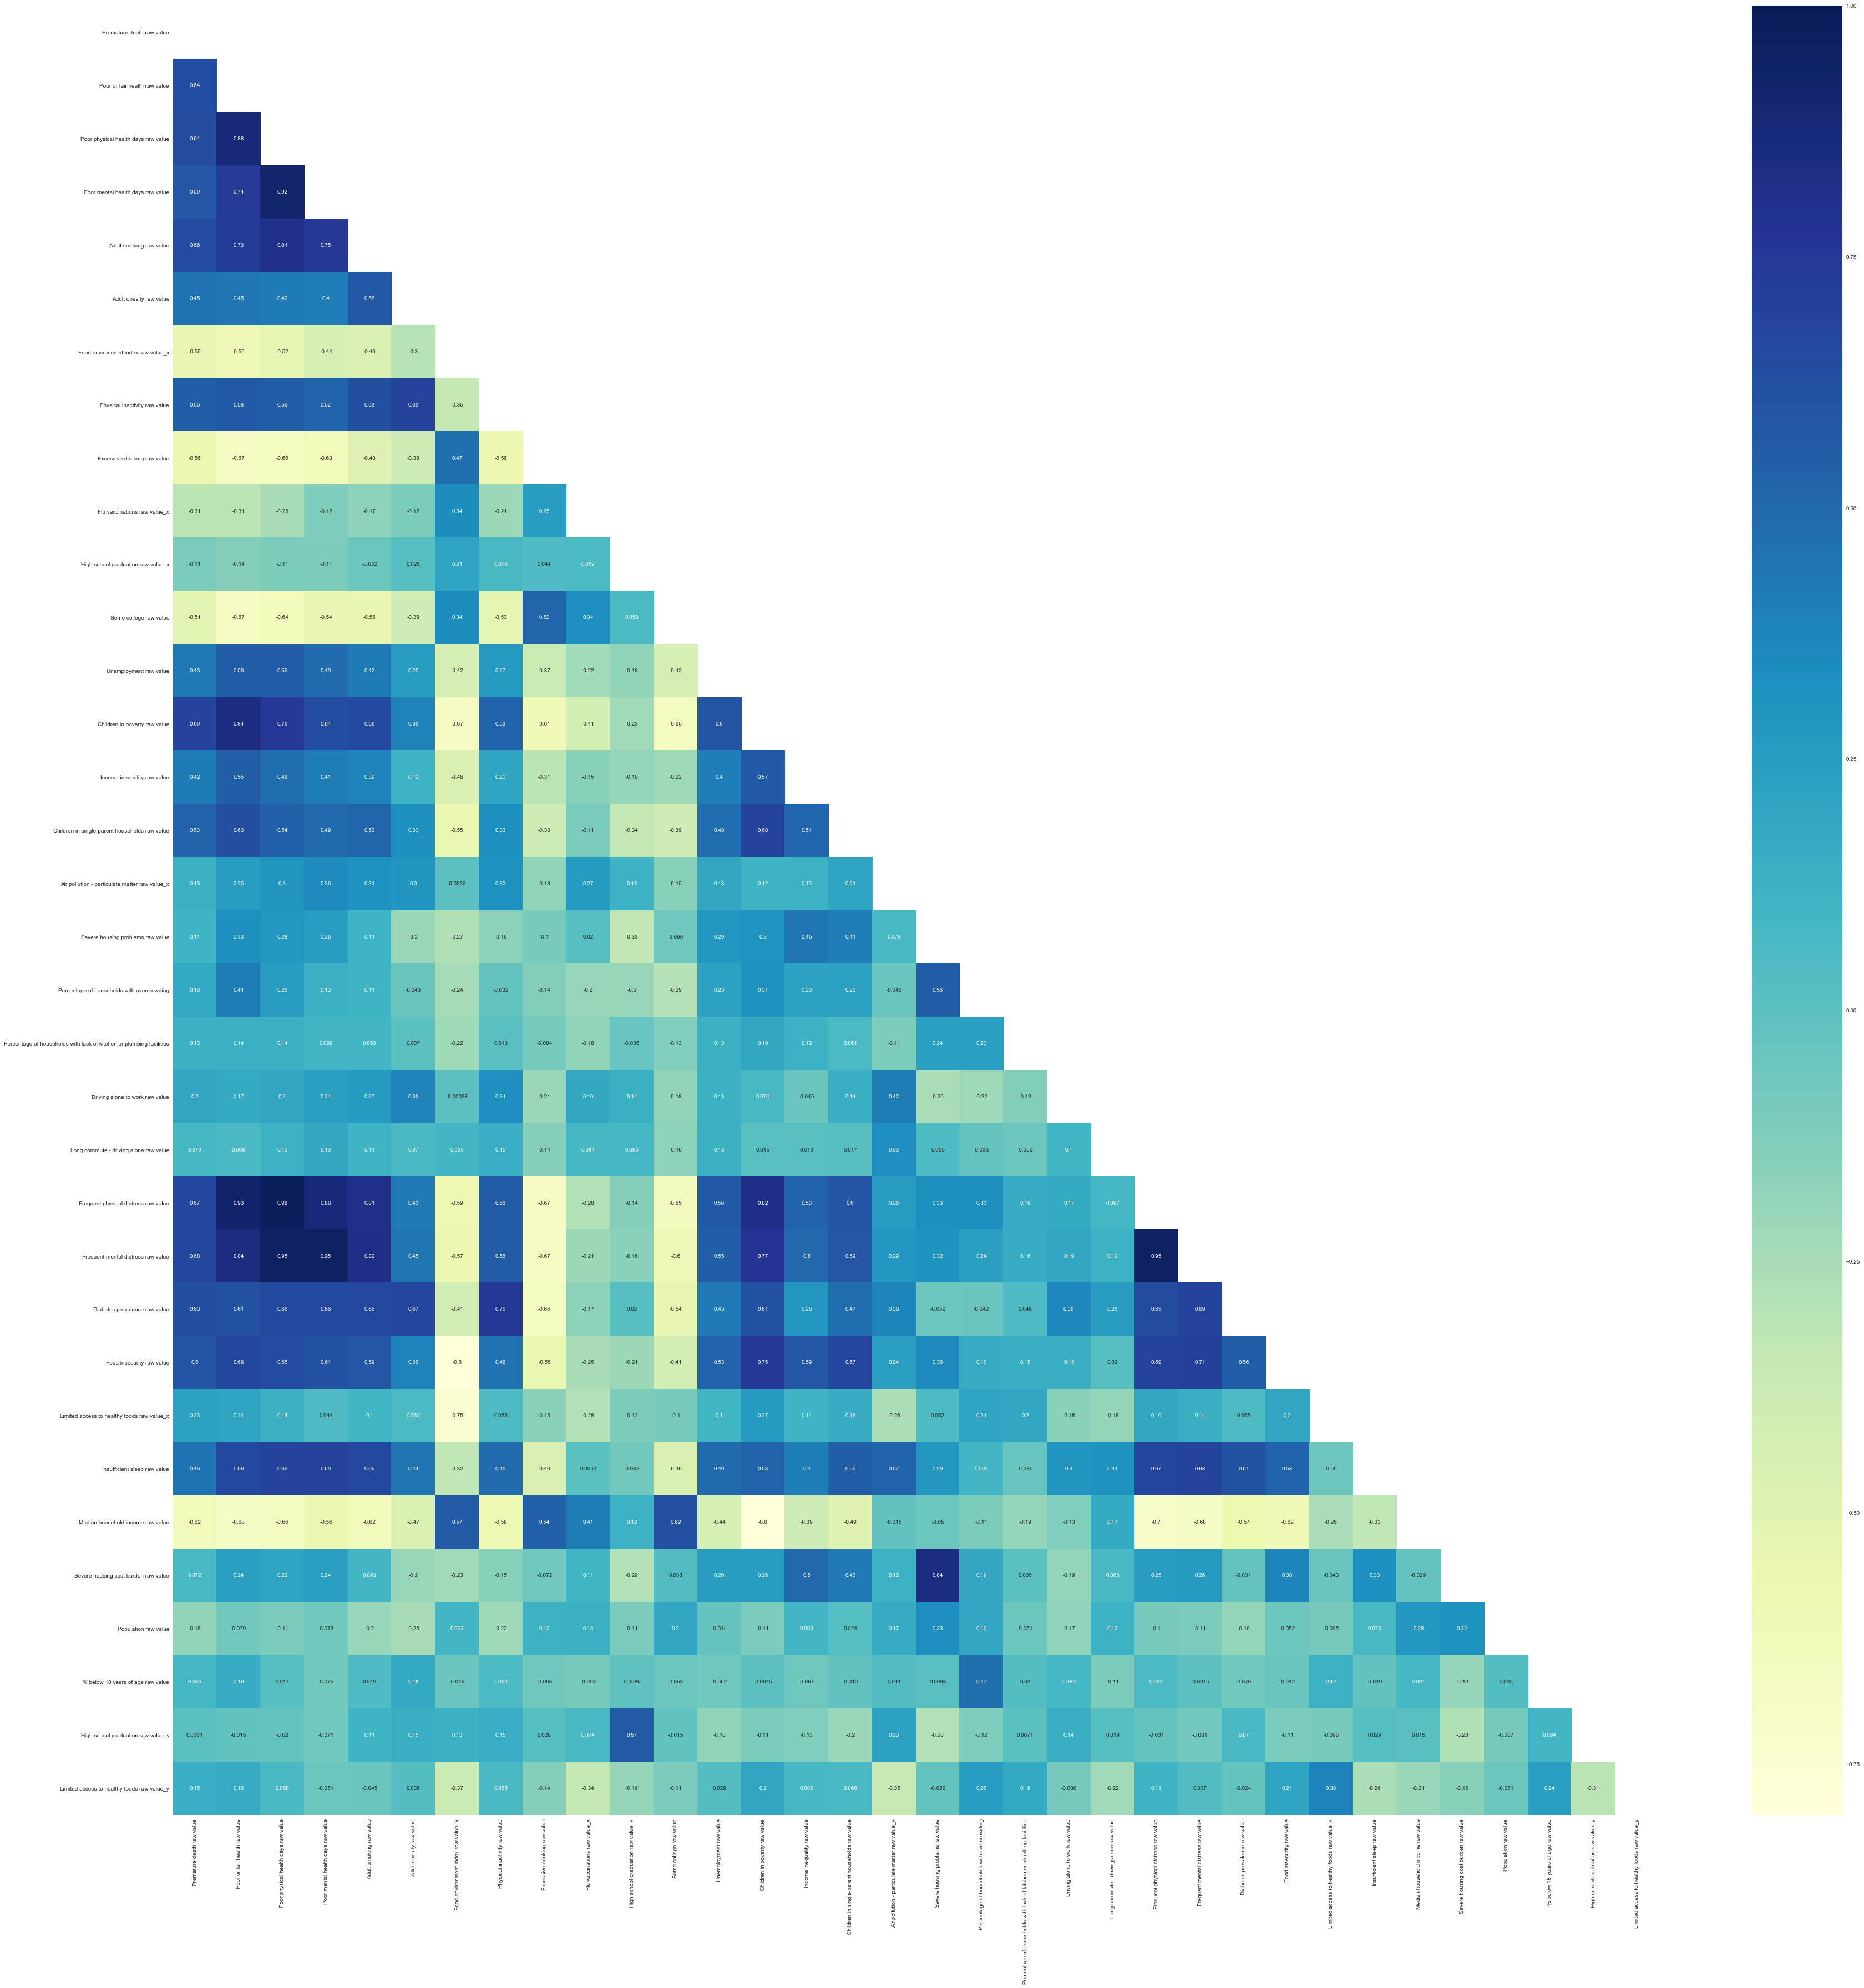

In [49]:
corr = df_clean4.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(60,60))
sns.heatmap(corr,annot=True, mask=mask,cmap="YlGnBu")
plt.autoscale()
plt.show()

# 3) Modelling

## Train Test Split

We split our dataset into a training dataset which is 2/3 of the data and a testing dataset which is 1/3 of the data.

In [50]:
y = df_clean4['Premature death raw value']
X = df_clean4.iloc[:,6:37]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.67)

In [51]:
X_train.head()

,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value_x,Physical inactivity raw value,Excessive drinking raw value,Flu vaccinations raw value_x,High school graduation raw value_x,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value_x,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value_x,Insufficient sleep raw value,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value
1345,0.136105,3.182204,3.184639,0.152042,0.319,8.5,0.202,0.234391,0.54,1.000000,0.840551,0.026602,0.088,5.728250,0.126363,6.2,0.144414,0.006812,0.002180,0.769396,0.086,0.098038,0.099592,0.084,0.107,0.037290,0.279426,59406.0,0.140719,9634.0,0.206041
2285,0.208892,4.455299,4.706189,0.184364,0.396,7.4,0.299,0.156300,0.45,0.756494,0.492313,0.053576,0.278,5.099525,0.509753,10.2,0.116159,0.015002,0.012430,0.869973,0.405,0.135993,0.143299,0.154,0.162,0.046782,0.370714,41327.0,0.103688,27537.0,0.213640
1725,0.168884,3.567030,3.341005,0.132530,0.248,8.9,0.219,0.164885,0.46,0.883930,0.625275,0.047731,0.134,5.245097,0.332354,10.4,0.275305,0.058628,0.012623,0.685605,0.417,0.112383,0.107834,0.086,0.096,0.010421,0.391785,76830.0,0.215259,563892.0,0.232947
632,0.129384,3.487725,3.391936,0.142619,0.279,8.9,0.214,0.211060,0.41,0.818000,0.576955,0.047906,0.140,3.835883,0.329982,11.3,0.103870,0.013442,0.008147,0.881215,0.293,0.098985,0.100809,0.102,0.090,0.021921,0.294035,64000.0,0.073034,5727.0,0.202025
2882,0.149926,3.904538,4.076764,0.140687,0.309,7.2,0.207,0.160208,0.24,0.850000,0.634896,0.058303,0.215,3.820092,0.234753,6.4,0.153210,0.029243,0.010807,0.714143,0.326,0.115468,0.121919,0.101,0.134,0.125898,0.311071,55282.0,0.121500,21811.0,0.193847


## Linear

We tested a linear regression model of our data and achieved an r-squared value of 0.6154.

In [52]:
#Instantiate Polynomial Features with Degrees of Freedom 10
poly_reg_l = PolynomialFeatures(degree=1)
#Fit and Transform X_train_s
X_poly_l = poly_reg_l.fit_transform(X_train)
#Instantiate and fit a linear regression model to a polynomial transformed train features
lin_reg_1 = LinearRegression().fit(X_poly_l,y_train)

In [53]:
#Get predicted values for transformed polynomial train data
y_pred = lin_reg_1.predict(X_poly_l)

In [54]:
print("R^2 score = {:.4f}".format(r2_score(y_train,lin_reg_1.predict(X_poly_l))))

R^2 score = 0.6154


## Quadratic

We wanted to employ polynomial features for our data so to begin with we explored the regression with a degree of freedom of 2 and achieved an r-squared of 0.7610.

In [55]:
#Instantiate Polynomial Features with Degrees of Freedom 2
poly_reg_q = PolynomialFeatures(degree=2)
#Fit and Transform X_train_s
X_poly_q = pd.DataFrame(poly_reg_q.fit_transform(X_train))
#Instantiate and fit a linear regression model to a polynomial transformed train features
lin_reg_2 = LinearRegression().fit(X_poly_q,y_train)

In [56]:
#Get predicted values for transformed polynomial train data
y_pred = lin_reg_2.predict(X_poly_q)

In [57]:
print("R^2 score = {:.4f}".format(r2_score(y_train,lin_reg_2.predict(X_poly_q))))

R^2 score = 0.7610


In [58]:
#Saving column names of polynomial variables for future use
poly_2_columns=poly_reg_q.get_feature_names(X_train.columns)

## Cubic

Next we tried for degrees of freedom of 3 and achieved a r-squared of 0.4065.

In [59]:
#Instantiate Polynomial Features with Degrees of Freedom 3
poly_reg_c = PolynomialFeatures(degree=3)
#Fit and Transform X_train_s
X_poly_c = pd.DataFrame(poly_reg_c.fit_transform(X_train))
#Instantiate and fit a linear regression model to a polynomial transformed train features
lin_reg_3 = LinearRegression().fit(X_poly_c,y_train)

In [60]:
#Get predicted values for transformed polynomial train data
y_pred = lin_reg_3.predict(X_poly_c)

In [61]:
print("R^2 score = {:.4f}".format(r2_score(y_train,lin_reg_3.predict(X_poly_c))))

R^2 score = 0.4065


In [62]:
#Saving column names of polynomial variables for future use
poly_3_columns=poly_reg_c.get_feature_names(X_train.columns)

## Scaling

The R-squared value was highest for the regression with degrees of freedom of 2 so we took the quadratic for further development.

In [63]:
#Polynomial transformation for a degree of freedom of 2 for the testing dataset, for later
X_poly_test = poly_reg_q.transform(X_test)

Here we did some scaling to our poly-transformed datasets.

In [64]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_poly_q)
X_test_s = scaler.transform(X_poly_test)

In [65]:
X_poly_q.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527
0,1.0,0.136105,3.182204,3.184639,0.152042,0.319,8.5,0.202,0.234391,0.54,1.000000,0.840551,0.026602,0.088,5.728250,0.126363,6.2,0.144414,0.006812,0.002180,0.769396,0.086,0.098038,0.099592,0.084,0.107,0.037290,0.279426,59406.0,0.140719,9634.0,0.206041,0.018525,0.433114,0.433446,0.020694,0.043418,1.156894,0.027493,0.031902,0.073497,0.136105,0.114403,0.003621,0.011977,0.779644,0.017199,0.843852,0.019656,0.000927,0.000297,0.104719,0.011705,0.013343,0.013555,0.011433,0.014563,0.005075,0.038031,8085.462885,0.019153,1311.237071,0.028043,10.126425,10.134172,0.483829,1.015123,27.048738,0.642805,0.745881,1.718390,3.182204,2.674806,0.084651,0.280034,18.228463,0.402112,19.729668,0.459555,0.021677,0.006937,2.448376,0.273670,0.311975,0.316921,0.267305,0.340496,0.118666,0.889190,189042.039725,0.447798,3.065736e+04,0.655665,10.141925,0.484199,1.015900,27.069431,0.643297,0.746452,1.719705,3.184639,2.676852,0.084716,0.280248,18.242408,0.402420,19.744761,0.459907,0.021694,0.006942,2.450249,0.273879,0.312214,0.317163,0.267510,0.340756,0.118756,0.889870,189186.658761,0.448141,3.068081e+04,0.656167,0.023117,0.048501,1.292359,0.030713,0.035637,0.082103,0.152042,0.127799,0.004045,0.013380,0.870936,0.019212,0.942661,0.021957,0.001036,0.000331,0.116981,0.013076,0.014906,0.015142,0.012772,0.016269,0.005670,0.042485,9032.217549,0.021395,1464.774330,0.031327,0.101761,2.7115,0.064438,0.074771,0.17226,0.319000,0.268136,0.008486,0.028072,1.827312,0.040310,1.9778,0.046068,0.002173,0.000695,0.245437,0.027434,0.031274,0.031770,0.026796,0.034133,0.011896,0.089137,18950.514,0.044889,3073.246,0.065727,72.25,1.7170,1.992326,4.590,8.500000,7.144685,0.226113,0.7480,48.690125,1.074083,52.70,1.227520,0.057902,0.018529,6.539867,0.7310,0.833319,0.846528,0.7140,0.9095,0.316968,2.375119,504951.0,1.196115,81889.0,1.751349,0.040804,0.047347,0.10908,0.202000,0.169791,0.005374,0.017776,1.157107,0.025525,1.2524,0.029172,0.001376,0.000440,0.155418,0.017372,0.019804,0.020118,0.016968,0.021614,0.007533,0.056444,12000.

In [66]:
X_poly_test.shape

(1008, 528)

## Regularisation Using Regression Models

### Lasso Regression

In [67]:
for i in [0.01,0.05,0.1,0.5,1,5,10,50,100]:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_s, y_train)
    print('Training r^2:', lasso.score(X_train_s, y_train))
    print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train_s)))

Training r^2: 0.7681331557619504
Training MSE: 1708125.9056542597
Training r^2: 0.7679926254317176
Training MSE: 1709161.1700897142
Training r^2: 0.7677139106773383
Training MSE: 1711214.4170462072
Training r^2: 0.7619584917262594
Training MSE: 1753613.6666695746
Training r^2: 0.7512329223026043
Training MSE: 1832627.2188039597
Training r^2: 0.6965432068471988
Training MSE: 2235517.5934464433
Training r^2: 0.6689912930788771
Training MSE: 2438488.1294567822
Training r^2: 0.6330744545601262
Training MSE: 2703081.726375248
Training r^2: 0.6164055703086694
Training MSE: 2825878.726963369


### Ridge Regression

In [68]:
for i in [0.01,0.05,0.1,0.5,1,5,10,50,100]:
    ridge = Ridge(alpha =i)
    ridge.fit(X_train_s, y_train)
    print('Training r^2:', ridge.score(X_train_s, y_train))
    print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train_s)))

Training r^2: 0.8000089283083295
Training MSE: 1473302.194536196
Training r^2: 0.7950131669735878
Training MSE: 1510105.1681669455
Training r^2: 0.7917603903047905
Training MSE: 1534067.85292051
Training r^2: 0.7806831105062559
Training MSE: 1615672.399056618
Training r^2: 0.7736271335494874
Training MSE: 1667652.6512102277
Training r^2: 0.750613739676009
Training MSE: 1837188.6380456546
Training r^2: 0.7380696082952539
Training MSE: 1929599.2448566908
Training r^2: 0.7039236450063331
Training MSE: 2181147.087580785
Training r^2: 0.6877783477962005
Training MSE: 2300086.9062932935


### Elastic Net Regression

In [69]:
for i in [0.01,0.05,0.1,0.5,1,5,10,50,100]:
    model = ElasticNet(alpha=i).fit(X_train_s,y_train)
    score = model.score(X_train_s, y_train)
    y_pred = model.predict(X_train_s)
    mse = mean_squared_error(y_train, y_pred)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(i, score, mse, np.sqrt(mse)))

Alpha:0.0100, R2:0.74, MSE:1930670.18, RMSE:1389.49
Alpha:0.0500, R2:0.70, MSE:2185323.19, RMSE:1478.28
Alpha:0.1000, R2:0.69, MSE:2305004.96, RMSE:1518.22
Alpha:0.5000, R2:0.65, MSE:2552140.83, RMSE:1597.54
Alpha:1.0000, R2:0.64, MSE:2636224.29, RMSE:1623.65
Alpha:5.0000, R2:0.62, MSE:2815749.26, RMSE:1678.02
Alpha:10.0000, R2:0.61, MSE:2909104.92, RMSE:1705.61
Alpha:50.0000, R2:0.56, MSE:3213316.31, RMSE:1792.57
Alpha:100.0000, R2:0.53, MSE:3480107.90, RMSE:1865.50


# 4) Validation

## K-Fold Cross Validation Using Standard Deviation

Using K-fold cross validation we tested each model by smallest standard deviation.

CHECK THIS ENTIRE SECTION!!!

In [70]:
std_for_models_lasso_dict = {}
for i in [0.01,0.05,0.1,0.5,1,5,10,50,100]:
    lasso = linear_model.Lasso(alpha=i)
    test = cross_validate(lasso,X_train_s,y_train,cv=5)
    std_for_models_lasso_dict[(test["test_score"].std())] = test["test_score"]
std_for_models_lasso_dict

{0.051303203748119454: array([0.44576258, 0.48076009, 0.32861683, 0.43490401, 0.40459445]),
 0.051151614905191385: array([0.44865428, 0.48590781, 0.33306684, 0.43675977, 0.4092164 ]),
 0.05110783936992702: array([0.45205636, 0.49221241, 0.33820584, 0.43843282, 0.41417554]),
 0.05122843964997191: array([0.4740657 , 0.53401981, 0.37471558, 0.4558875 , 0.44574941]),
 0.050712670077277415: array([0.48429966, 0.56713361, 0.40723187, 0.4852912 , 0.47674242]),
 0.033922108173176646: array([0.51494232, 0.6023964 , 0.56365703, 0.55698406, 0.60828595]),
 0.038957381032566324: array([0.53373876, 0.60170327, 0.61388997, 0.58038171, 0.65182014]),
 0.0490437725428341: array([0.54122267, 0.59232211, 0.63017603, 0.59951905, 0.69043261]),
 0.049482143424973764: array([0.52944226, 0.58406969, 0.60260759, 0.57839217, 0.68155435])}

In [71]:
std_for_models_ridge_dict = {}
for i in [0.01,0.05,0.1,0.5,1,5,10,50,100]:
    ridge = linear_model.Ridge(alpha=i)
    test = cross_validate(ridge,X_train_s,y_train,cv=5)
    std_for_models_ridge_dict[(test["test_score"].std())] = test["test_score"]
std_for_models_ridge_dict

{0.051190228469517006: array([0.37728522, 0.24974412, 0.32097267, 0.39708996, 0.33669912]),
 0.04073774378090477: array([0.40446156, 0.33860063, 0.29912148, 0.40664946, 0.36171542]),
 0.04231850714355899: array([0.41861609, 0.3876132 , 0.3028166 , 0.41815392, 0.37928068]),
 0.04992568408827832: array([0.45265171, 0.50949412, 0.35562445, 0.46056998, 0.44023977]),
 0.04996597819676836: array([0.46664533, 0.54797155, 0.39065716, 0.4802182 , 0.47120885]),
 0.03907795554872994: array([0.49569798, 0.59580759, 0.48605644, 0.52562664, 0.54342733]),
 0.03481699678851447: array([0.5073656 , 0.6066553 , 0.52946545, 0.54458276, 0.57481507]),
 0.04093861838451183: array([0.52896858, 0.61722512, 0.61414901, 0.57772734, 0.6487461 ]),
 0.0473022789831383: array([0.53416999, 0.61469122, 0.63754739, 0.58508237, 0.67356471])}

In [72]:
std_for_models_en_dict = {}
for i in [0.01,0.05,0.1,0.5,1,5,10,50,100]:
    elastic_net = linear_model.ElasticNet(alpha=i)
    test = cross_validate(elastic_net,X_train_s,y_train,cv=5)
    std_for_models_en_dict[(test["test_score"].std())] = test["test_score"]
std_for_models_en_dict

{0.03756758554128009: array([0.50270068, 0.60351144, 0.50520641, 0.53227384, 0.55904971]),
 0.038751442500418: array([0.52781704, 0.61557454, 0.60727915, 0.57599776, 0.64051766]),
 0.04460575854885168: array([0.5335426 , 0.61685445, 0.63150545, 0.58498808, 0.66506958]),
 0.05368710487831475: array([0.53756462, 0.60431718, 0.64920071, 0.5921423 , 0.69632118]),
 0.05439341539185922: array([0.53490084, 0.60036851, 0.6415758 , 0.59101687, 0.69805598]),
 0.054665958088116015: array([0.52046723, 0.5933515 , 0.61112696, 0.58049717, 0.68984675]),
 0.05379190182954042: array([0.51238815, 0.58818087, 0.59596313, 0.57170062, 0.67984014]),
 0.04776376994543207: array([0.48557822, 0.56613152, 0.55395049, 0.54085357, 0.63417605]),
 0.04339239199656987: array([0.45593677, 0.54048281, 0.51631003, 0.51096153, 0.58950072])}

## Model Selection

Using the GridSearch Cross Vaidation method we found out the alpha value with the best R-squared score for each regression.

In [73]:
lassomodel = Lasso()
# alpha was narrowed down manually
lasso_params = {'alpha' : [26.99,27,27.01]}
grid = GridSearchCV(estimator = lassomodel,
                    param_grid = lasso_params,
                    scoring = 'r2',
                    cv = 5,
                    n_jobs = -1)
grid = grid.fit(X_train_s, y_train)
print(grid.best_params_)
print('R2: ', grid.best_score_)

{'alpha': 27}
R2:  0.6153299979258943


In [74]:
ridgemodel = Ridge()
# alpha was narrowed down manually
Ridge_params = {'alpha' : [316.44,316.45,316.46]}
grid = GridSearchCV(estimator = ridgemodel,
                    param_grid = Ridge_params,
                    scoring = 'r2',
                    cv = 5,
                    n_jobs = -1)
grid = grid.fit(X_train_s, y_train)
print(grid.best_params_)
print('R2: ', grid.best_score_)

{'alpha': 316.45}
R2:  0.6156859681086009


In [75]:
elasticnetmodel = ElasticNet()
# alpha was narrowed down manually
ElasticNet_params = {'alpha' : [0.51,0.52,0.53]}
grid = GridSearchCV(estimator = elasticnetmodel,
                    param_grid = ElasticNet_params,
                    scoring = 'r2',
                    cv = 5,
                    n_jobs = -1)
grid = grid.fit(X_train_s, y_train)
print(grid.best_params_)
print('R2: ', grid.best_score_)

{'alpha': 0.52}
R2:  0.615967090127432


## Coefficients of Best Models

We formed arrays containing coefficients of the respective regression models.

In [76]:
lasso_best = Lasso(alpha=27)
lasso_best.fit(X_train_s, y_train)
y_h_lasso_train = lasso_best.predict(X_train_s)
print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
lasso_coef = lasso_best.coef_

Train Error Lasso Model 5338281748.731492


In [77]:
ridge_best = Ridge(alpha=316.45)
ridge_best.fit(X_train_s, y_train)
y_h_ridge_train = ridge_best.predict(X_train_s)
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
ridge_coef = ridge_best.coef_

Train Error Ridge Model 5081338052.513775


In [78]:
en_best = ElasticNet(alpha=0.52)
en_best.fit(X_train_s, y_train)
y_h_en_train = en_best.predict(X_train_s)
print('Train Error Elatic Net Model', np.sum((y_train - y_h_en_train)**2))
en_coef = en_best.coef_

Train Error Elatic Net Model 5227282251.622469


# 5) Testing Final Model

## Lasso Model Test Data

Here we tested the lasso regression model formed using training data R-squared when using testing data. We have achieved a higher R-squared for the test data over than training data so our model is fairly accurate.

CHECK LINE ABOVE!!!

Training Score:  0.6454811171535471
Test Score: 0.6811076042410495


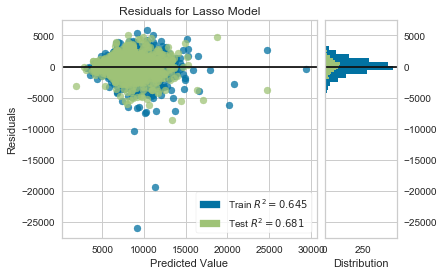

In [79]:
lasso = Lasso(alpha=27)
lasso.fit(X_train_s,y_train)
lasso_train_score=lasso.score(X_train_s,y_train)
lasso_test_score=lasso.score(X_test_s,y_test)

print('Training Score: ',lasso_train_score)
print('Test Score:' ,lasso_test_score)

visualizer = ResidualsPlot(lasso)
visualizer.fit(X_train_s, y_train)
visualizer.score(X_test_s, y_test)
visualizer.show()

## Coefficient Weighting

Creating a dataframe containing the Lasso model variables and their respective weights.

In [85]:
df = pd.DataFrame(list(zip(poly_2_columns,lasso_coef)))
df.columns = ['Coefficient','ScaledValue']
df['PolyValue'] = scaler.inverse_transform(df['ScaledValue'])
df['Abs_Value'] = (abs(df['PolyValue']))**(1./2)
df = df[df['ScaledValue']!=0]
for i,row in df.iterrows():
    if row["PolyValue"] < 0:
        df.loc[i,"Value"] = (-1)*row['Abs_Value']
    else:
        df.loc[i,"Value"] = row['Abs_Value']
df

,Coefficient,ScaledValue,PolyValue,Abs_Value,Value
32,Poor or fair health raw value^2,-42.641263,-0.769326,0.877112,-0.877112
49,Poor or fair health raw value Percentage of households with overcrowding,-223.558270,-1.103426,1.050441,-1.050441
93,Poor mental health days raw value^2,26.519430,144.711892,12.029626,12.029626
113,Poor mental health days raw value Frequent mental distress raw value,198.132378,29.950235,5.472681,5.472681
136,Adult smoking raw value Percentage of households with overcrowding,778.789486,3.369511,1.835623,1.835623
149,Adult smoking raw value % below 18 years of age raw value,428.304788,4.704029,2.168877,2.168877
153,Adult obesity raw value Excessive drinking raw value,-87.421392,-0.868285,0.931818,-0.931818
179,Food environment index raw value_x Excessive drinking raw value,-6.876466,-1.207498,1.098862,-1.098862
184,Food environment index raw value_x Children in poverty raw value,66.554217,37.170230,6.096739,6.096739
189,Food environment index raw value_x Percentage of households with overcrowding,-308.473877,-38.832219,6.231550,-6.231550


In [86]:
df.sort_values('ScaledValue', ascending = False)

,Coefficient,ScaledValue,PolyValue,Abs_Value,Value
136,Adult smoking raw value Percentage of households with overcrowding,778.789486,3.369511,1.835623,1.835623
149,Adult smoking raw value % below 18 years of age raw value,428.304788,4.704029,2.168877,2.168877
367,Income inequality raw value Diabetes prevalence raw value,251.191827,42.755226,6.538748,6.538748
299,Some college raw value Children in poverty raw value,237.652539,9.523807,3.086067,3.086067
113,Poor mental health days raw value Frequent mental distress raw value,198.132378,29.950235,5.472681,5.472681
216,Physical inactivity raw value Driving alone to work raw value,190.521430,9.422344,3.069584,3.069584
391,Children in single-parent households raw value % below 18 years of age raw value,184.659917,5.056072,2.248571,2.248571
369,Income inequality raw value Limited access to healthy foods raw value_x,133.956933,49.346326,7.024694,7.024694
353,Children in poverty raw value Median household income raw value,125.971832,313349.227125,559.776051,559.776051
364,Income inequality raw value Long commute - driving alone raw value,90.753476,55.117374,7.424108,7.424108
